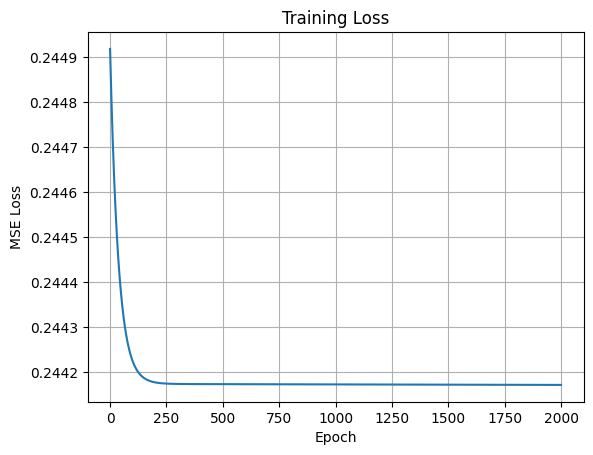

Accuracy: 0.5853658536585366
Confusion Matrix:
 [[  0  85]
 [  0 120]]
Precision: 0.5853658536585366
Recall: 1.0
F1 Score: 0.7384615384615385


In [3]:
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# ----- STEP 1: Boolean Function -----
def boolean_function(x):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10 = x
    a = x1 ^ x2
    b = x3 | x4
    c = x5 & x6
    d = x7 ^ x8
    e = x9 ^ x10
    return ((a & b) ^ c) | (d & e)

# ----- STEP 2: Generate Data -----
X = np.array(list(itertools.product([0, 1], repeat=10)))
y = np.array([boolean_function(row) for row in X]).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- STEP 3: Neural Network from Scratch -----
class NeuralNetwork:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        self.W1 = np.random.randn(input_size, hidden1_size) * 0.1
        self.b1 = np.zeros((1, hidden1_size))
        self.W2 = np.random.randn(hidden1_size, hidden2_size) * 0.1
        self.b2 = np.zeros((1, hidden2_size))
        self.W3 = np.random.randn(hidden2_size, output_size) * 0.1
        self.b3 = np.zeros((1, output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_deriv(self, a):
        return a * (1 - a)

    def tanh(z):
        return np.tanh(z)

    def tanh_derivative(a):
        return 1 - np.square(a)

    def relu(z):
        return np.maximum(0, z)

    def relu_derivative(a):
        return np.where(a > 0, 1, 0)

    def leaky_relu(z, alpha=0.01):
        return np.where(z > 0, z, alpha * z)

    def leaky_relu_derivative(a, alpha=0.01):
        return np.where(a > 0, 1, alpha)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = self.sigmoid(self.z3)
        return self.a3

    def backward(self, X, y, output, lr):
        m = y.shape[0]
        d3 = (output - y) * self.sigmoid_deriv(output)
        dW3 = np.dot(self.a2.T, d3) / m
        db3 = np.sum(d3, axis=0, keepdims=True) / m

        d2 = np.dot(d3, self.W3.T) * self.sigmoid_deriv(self.a2)
        dW2 = np.dot(self.a1.T, d2) / m
        db2 = np.sum(d2, axis=0, keepdims=True) / m

        d1 = np.dot(d2, self.W2.T) * self.sigmoid_deriv(self.a1)
        dW1 = np.dot(X.T, d1) / m
        db1 = np.sum(d1, axis=0, keepdims=True) / m

        self.W3 -= lr * dW3
        self.b3 -= lr * db3
        self.W2 -= lr * dW2
        self.b2 -= lr * db2
        self.W1 -= lr * dW1
        self.b1 -= lr * db1

    def train(self, X, y, epochs, lr):
        losses = []
        for i in range(epochs):
            output = self.forward(X)
            loss = np.mean((output - y)**2)
            losses.append(loss)
            self.backward(X, y, output, lr)
        return losses

# ----- STEP 4: Training and Evaluation -----
nn = NeuralNetwork(10, 5, 5, 1)
losses = nn.train(X_train, y_train, epochs=2000, lr=0.1)

# Plot loss
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

# Predictions and Metrics
preds = nn.forward(X_test) > 0.5
y_true = y_test

print("Accuracy:", accuracy_score(y_true, preds))
print("Confusion Matrix:\n", confusion_matrix(y_true, preds))
print("Precision:", precision_score(y_true, preds))
print("Recall:", recall_score(y_true, preds))
print("F1 Score:", f1_score(y_true, preds))